The LLMs will analyze the dataset of the most popular netflix original tv shows, and write jupyter notebook code to analyze how episode runtime affects the popularity and ratings of each series.

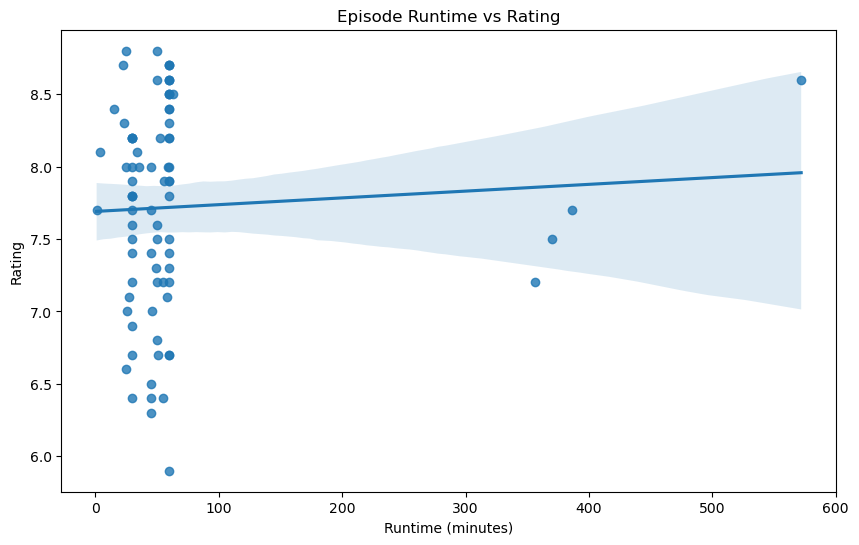

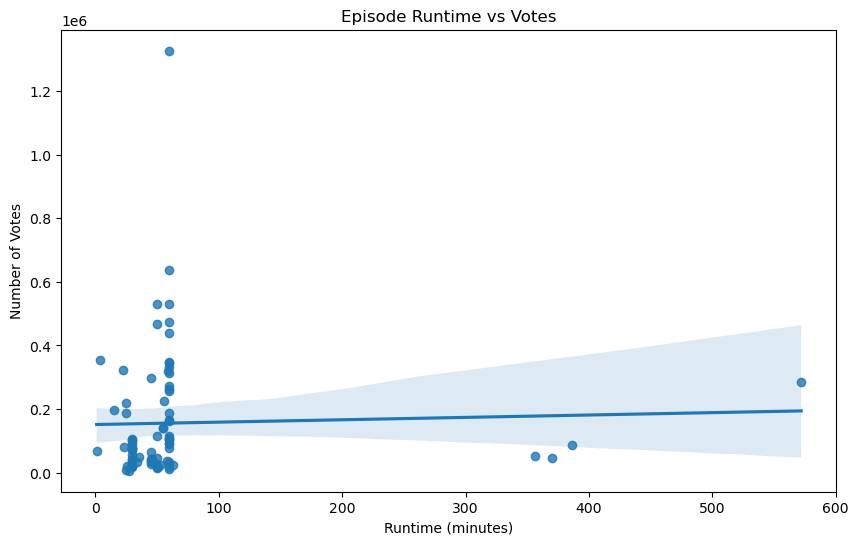

Correlation between runtime and rating: 0.06
Correlation between runtime and votes: 0.03


In [4]:
# Claire

# input 1. Using the attached dataset of the most popular netflix original tv shows, write jupyter notebook code to 
# analyze how episode runtime affects the popularity and ratings of each series.

# input 2. fix the "can't multiply sequence by non-int of type 'float'" in the code above

# input 3. The "can't multiply sequence by non-int of type 'float'" error still occurred at the line 
# sns.regplot(x='runtime', y='votes', data=data)

# final code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the data
data = pd.read_csv('Most_Watched_Netflix_Original_Shows.csv')

# Convert runtime to numeric values (dropping entries with non-numeric values)
data['runtime'] = data['runtime'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
data.dropna(subset=['runtime'], inplace=True)

# Remove commas from the 'votes' column and convert to numeric
data['votes'] = data['votes'].str.replace(',', '').astype(int)

# Scatter plot of runtime vs rating
plt.figure(figsize=(10, 6))
sns.regplot(x='runtime', y='rating', data=data)
plt.title('Episode Runtime vs Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.show()

# Scatter plot of runtime vs votes
plt.figure(figsize=(10, 6))
sns.regplot(x='runtime', y='votes', data=data)
plt.title('Episode Runtime vs Votes')
plt.xlabel('Runtime (minutes)') 
plt.ylabel('Number of Votes')
plt.show()

# Calculate correlation coefficients
print(f"Correlation between runtime and rating: {data['runtime'].corr(data['rating']):.2f}")
print(f"Correlation between runtime and votes: {data['runtime'].corr(data['votes']):.2f}")

In [ ]:
# Llama 2
# Note: Llama 2 does not support the uploading of .csv files (or any spreadsheet files). 
# Llama 2 is also much more annoying to use, for lack of a better word. 
# i'll come back to it 


In [2]:
# Gemini
# input: Using the attached dataset api of the most popular netflix original tv shows, write jupyter notebook code to analyze how episode runtime affects the popularity and ratings of each series. read the dataset as Most_Watched_Netflix_Original_Shows.csv.
# the api key is:
# kaggle datasets download -d jatinthakur706/most-watched-netflix-original-shows-tv-time

# output: I'd be glad to help you analyze the Netflix Original Shows dataset, but I'm unable to access external APIs or 
# download datasets directly within the response due to security restrictions. However, I can provide you with the Jupyter
# Notebook code assuming you've already downloaded the dataset as "Most_Watched_Netflix_Original_Shows.csv":
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("Most_Watched_Netflix_Original_Shows.csv")

# Create a scatter plot to visualize episode runtime vs. rating
plt.figure(figsize=(10, 6))
plt.scatter(df["timing"], df["rating"])
plt.xlabel("Episode Runtime (minutes)")
plt.ylabel("Rating")
plt.title("Episode Runtime vs. Rating")
plt.grid(True)
plt.show()

# Calculate average rating for each episode runtime category
df_grouped = df.groupby("timing")["rating"].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(df_grouped["timing"], df_grouped["rating"])
plt.xlabel("Episode Runtime (minutes)")
plt.ylabel("Average Rating")
plt.title("Average Rating by Episode Runtime")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

# Analyze popularity (number of votes) vs. episode runtime (optional)
# You can follow similar steps as above to create visualizations for popularity

# Additional analyses (optional)
# - Calculate correlation coefficient between episode runtime and rating
# - Group shows by genre and analyze runtime vs. rating within each genre

print("Analysis completed. Please refer to the generated visualizations.")


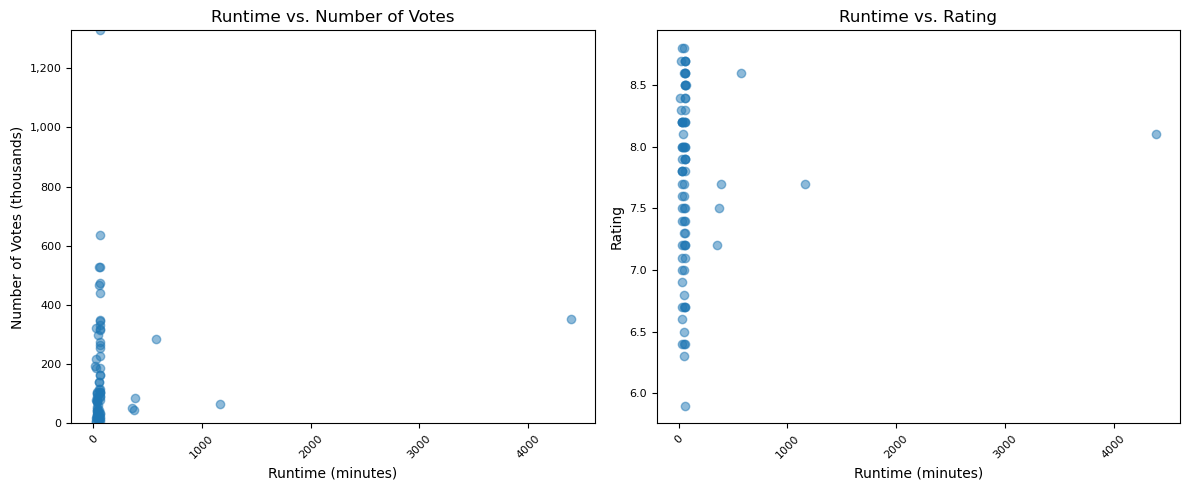

In [17]:
# ChatGPT
# Input 1:
# -----------------------------------------------------------------------------------------------------------
# Create a Python code that can analyze a dataset of popular Netflix shows from a .cvs file.
# The column headers are : lister-item-index, lister-item-header, certificate, runtime, genre, rating, votes
# The file can be found at:
# https://drive.google.com/file/d/1p7aohvsJfvLxYfiaOToZLLPfbsKcxDnR/view?usp=sharing
# Make sure to consider the following list of criteria:

# 1. Analyze Netflix dataset.
# 2. Compare runtimes' impact on views and ratings.
# 3. Improve graph labels readability.
# 4. Ascending x-axis and y-axis sorting.
# 5. Ensure correct DataFrame value reading.
# -----------------------------------------------------------------------------------------------------------

# Input 2:
# -----------------------------------------------------------------------------------------------------------
# Consider this, the values in the minutes column are followed by the letters "min", this is causing the number values to improperly sort. 
# Find a way to remove this short string "min" from the ends before casting the values as integers and then sorting in ascending order
# -----------------------------------------------------------------------------------------------------------

# Input 3:
# -----------------------------------------------------------------------------------------------------------
# The runtime values are still being treated as literals, and not integers.
# -----------------------------------------------------------------------------------------------------------

# Input 4:
# -----------------------------------------------------------------------------------------------------------
# That did not work. This is the error:
# ValueError: invalid literal for int() with base 10: '4,393 '
# -----------------------------------------------------------------------------------------------------------

# Input 5:
# -----------------------------------------------------------------------------------------------------------
# The same issue is occurring in the y-axis, please fix it
# -----------------------------------------------------------------------------------------------------------

# Input 6:
# -----------------------------------------------------------------------------------------------------------
# Display the y-axis on graph 1 by thousands of votes
# -----------------------------------------------------------------------------------------------------------

# Final Code from ChatGPT:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load Netflix dataset
url = "https://drive.google.com/uc?id=1p7aohvsJfvLxYfiaOToZLLPfbsKcxDnR"
netflix_data = pd.read_csv(url)

# Remove "min" and commas from the 'runtime' column and convert to integers
netflix_data['runtime'] = netflix_data['runtime'].str.replace('min', '').str.replace(',', '').astype(float).astype(int)

# Remove commas from the 'votes' column and convert to integers
netflix_data['votes'] = netflix_data['votes'].str.replace(',', '').astype(int)

# Sort dataset by runtime
netflix_data.sort_values(by='runtime', inplace=True)

# Plotting
plt.figure(figsize=(12, 5))

# Scatter plot for runtime vs. number of votes
ax1 = plt.subplot(1, 2, 1)
plt.scatter(netflix_data['runtime'], netflix_data['votes'], alpha=0.5)
plt.title('Runtime vs. Number of Votes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Votes (thousands)')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

# Format y-axis labels in thousands
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000))
ax1.yaxis.set_major_formatter(formatter)

plt.ylim(0, netflix_data['votes'].max())  # Limit y-axis range to maximum votes

# Scatter plot for runtime vs. rating
plt.subplot(1, 2, 2)
plt.scatter(netflix_data['runtime'], netflix_data['rating'], alpha=0.5)
plt.title('Runtime vs. Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()





# Issues: 
# ----------------------------------------------------------------------------------------------------------
# ChatGPT had trouble understanding the context behind commas and placing them in numbers.
# Until prompted about this, it did not realize the fix was needed, but once asked it immediately fixed the issue.





